In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
def read_data(file_path : str):
    """function that read a csv file into a dataframe
    inputs : filename or filepath : str
    output : df : dataframe object"""
    df = pd.read_csv(file_path,delimiter=";")
    return df


In [7]:
df=read_data('titanic-passengers.csv')
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [8]:
first_row = df.iloc[0]

In [9]:
display(first_row)

PassengerId                           343
Survived                               No
Pclass                                  2
Name           Collander, Mr. Erik Gustaf
Sex                                  male
Age                                  28.0
SibSp                                   0
Parch                                   0
Ticket                             248740
Fare                                 13.0
Cabin                                 NaN
Embarked                                S
Name: 0, dtype: object

In [10]:
def assess_data_quality(data):
    """function to check for data inconsistency : duplicates , missing values"""   
    dup=data.duplicated().sum()
    missing_data=data.isnull().sum().sum()
    missing_data_places=data.isnull().sum()
    missing_data_places=missing_data_places.to_frame()
    report_dict={"duplicated data":[dup],"missing data":[missing_data]}

    report = pd.DataFrame(data=report_dict)
    return report,missing_data_places
data_quality=assess_data_quality(df)
data_quality
#we can improve it and make it more look better

(   duplicated data  missing data
 0                0           866,
                0
 PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age          177
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Cabin        687
 Embarked       2)

In [20]:
from sklearn.model_selection import train_test_split
def split(df):
    features= df.drop(['Survived'],axis=1).values
    target = df['Survived'].values
    features_train, features_test , target_train, target_test, = train_test_split(features, target, test_size=0.25, random_state=42)
    features_train=pd.DataFrame(features_train)
    features_test=pd.DataFrame(features_test)
    target_train=pd.DataFrame(target_train)
    target_test=pd.DataFrame(target_test)
    
    
    return(features_train, features_test, target_train, target_test)
features_train, features_test, target_train, target_test=split(df)



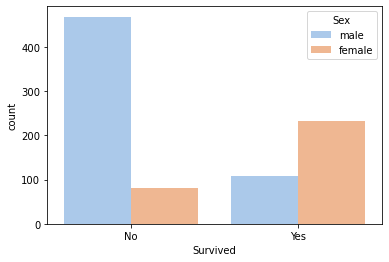

In [24]:
sns.countplot(x='Survived',hue="Sex" ,data=df,palette='pastel');

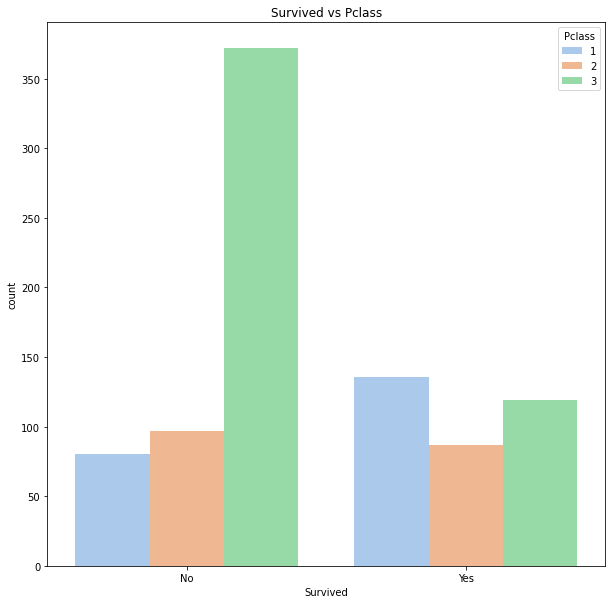

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(x='Survived', hue='Pclass', data=df, palette='pastel')
plt.title('Survived vs Pclass') # add a title to our figure 
plt.show()

In [28]:
df['Title'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
df.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Don               1
Lady              1
Jonkheer          1
Mme               1
Sir               1
Capt              1
the Countess      1
Ms                1
Name: Title, dtype: int64

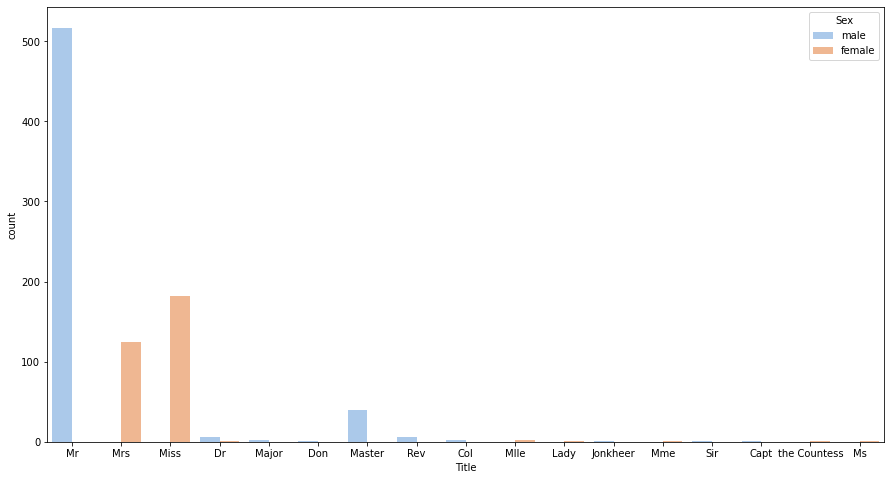

In [31]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Title',hue = 'Sex' ,data=df,palette='pastel')

In [32]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty" ,

                  "the Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr":         "Mr",
                    "Mrs" :       "Mrs" ,

                    "Master" :    "Master"

                    }

In [34]:
df.Title = df.Title.map(Title_Dictionary)

In [35]:
df.Title

0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: Title, Length: 891, dtype: object

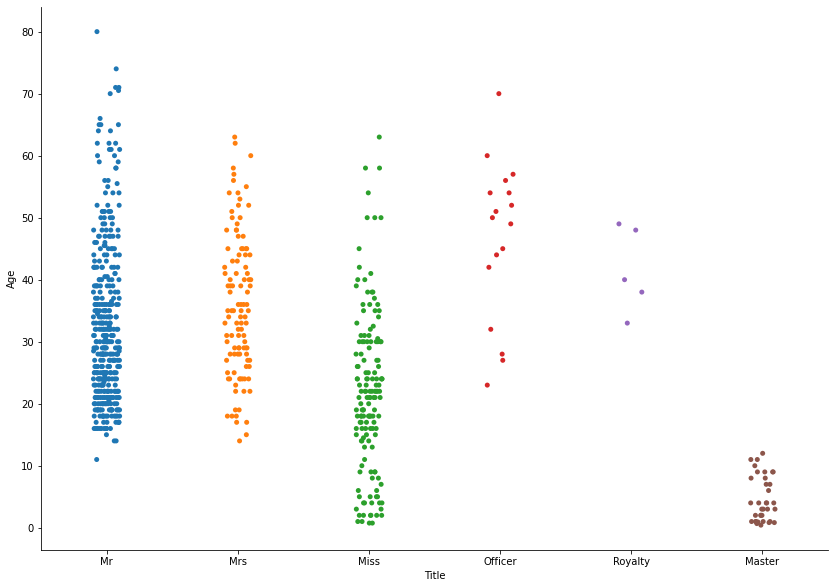

In [36]:
sns.catplot(x="Title", y="Age", data=df , height=8.27, aspect=11.7/8.27);

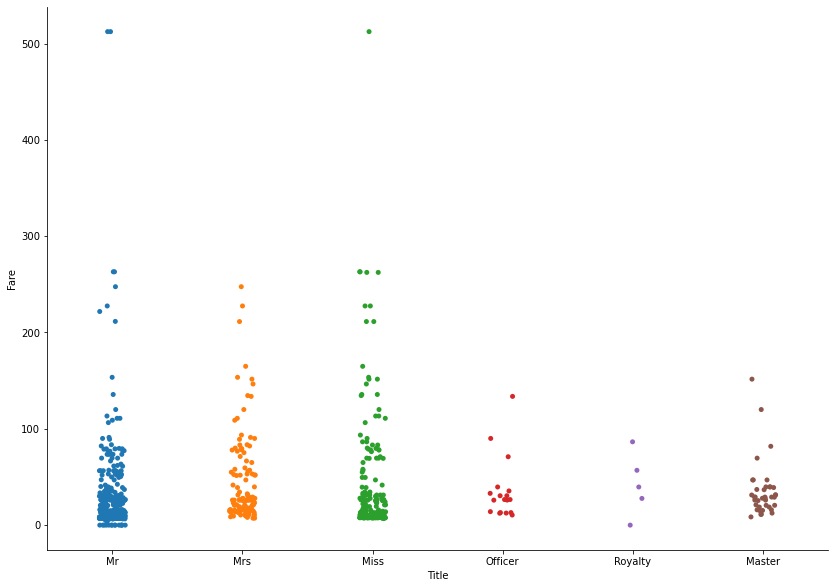

In [37]:
sns.catplot(x="Title", y="Fare", data=df , height=8.27, aspect=11.7/8.27);